In [58]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

1. Kolmogorov - Smirnov test

In [59]:
def genearateNormalDistribution():
    """z1 = sqrt(-2lnU1)cos(2piU2)
    z2 = sqrt(-2lnU1)sin(2piU2)"""
    
    u1 = np.random.uniform(0, 1)
    u2 = np.random.uniform(0, 1)  
    rho = np.sqrt(-2 * np.log(u1))
    phi = 2 * np.pi * u2
    z1 = rho * np.cos(phi)
    z2 = rho * np.sin(phi)
    
    return z1, z2

In [60]:
N = 10000
Z1 = np.zeros(N)
Z2 = np.zeros(N)

for i in range(N):
    (Z1[i], Z2[i]) = genearateNormalDistribution()

Z1 = 1 + 2 * Z1

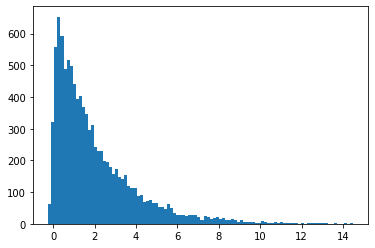

In [91]:
def function(y, _lambda=0.5):
    return -np.log(1 - y) / _lambda

y = []
values = []
for i in np.linspace(0, 1, 10000):
    rand = np.random.uniform(0, 1)
    y.append(rand)
    values.append(function(rand))
    
plt.hist(values+0.1*Z2, bins=100)
plt.show()

In [92]:
dist = getattr(st, 'expon')
param = dist.fit(values)

In [93]:
param

(5.2350419253006205e-05, 2.0293707459498553)

In [94]:
st.kstest(values, 'expon', args=param)

KstestResult(statistic=0.005967057378662655, pvalue=0.8686144713845608)

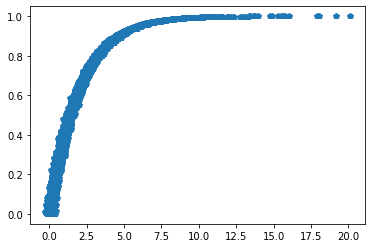

In [52]:
plt.plot(values + 0.1*Z2, y, 'p')

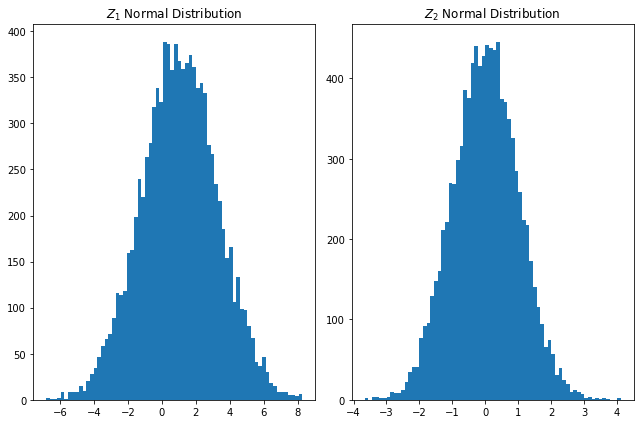

In [53]:
fig, axes = plt.subplots(1,2, figsize=(9, 6))
z1_hist = axes[0].hist(Z1+Z2, bins=70)
# axes[0].set_xlim([-4, 4.5])
axes[0].set_title(r"$Z_1$ Normal Distribution")
z2_hist = axes[1].hist(Z2, bins=70)
axes[1].set_title(r"$Z_2$ Normal Distribution")
plt.tight_layout()
plt.show()

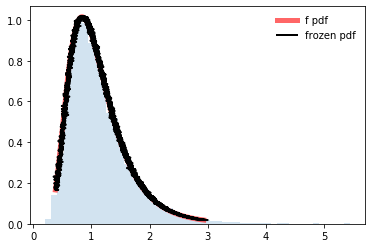

In [81]:
from scipy.stats import f
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

dfn, dfd = 29, 18



# percent point function
x = np.linspace(f.ppf(0.01, dfn, dfd),
                f.ppf(0.99, dfn, dfd), 10000)

ax.plot(x, f.pdf(x, dfn, dfd),
       'r-', lw=5, alpha=0.6, label='f pdf')

rv = f(dfn, dfd)
ax.plot(x + 0.01*Z1, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# 
r = f.rvs(dfn, dfd, size=10000)

ax.hist(r, bins=50, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [87]:
dist = getattr(st, 'f')

In [88]:
params = dist.fit(x)

In [89]:
params

(3376.4487420325577, 8475.20829021591, -23.93048973650635, 25.579762946331016)

In [90]:
st.kstest(x, 'f', args=param)

KstestResult(statistic=0.9994483627199343, pvalue=0.0)

In [70]:
mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')
mean, var, skew, kurt

(array(1.125), array(0.28055727), array(1.80656765), array(7.07463602))

In [95]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme", "expon"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [98]:
get_best_distribution(values+0.001*Z1)

p value for norm = 4.297477094036227e-209
p value for exponweib = 0.8411295158409671
p value for weibull_max = 0.0
p value for weibull_min = 9.045911683651546e-41
p value for pareto = 2.1581977024778716e-145
p value for genextreme = 1.3887675953501913e-15
p value for expon = 0.7668068493779877
Best fitting distribution: exponweib
Best p value: 0.8411295158409671
Parameters for the best fit: (1.031865258613379, 0.9946824508310528, -0.0024246117430034167, 1.987693646420841)


('exponweib',
 0.8411295158409671,
 (1.031865258613379,
  0.9946824508310528,
  -0.0024246117430034167,
  1.987693646420841))